<a href="https://colab.research.google.com/github/bovo1/Pet_Skin_Disease/blob/main/pet_skin_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
import glob
import shutil
from tqdm.notebook import tqdm
import cv2
import json
import numpy as np
import pandas as pd

drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM")
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM


In [ ]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리

fe = fm.FontEntry(fname=r'/content/drive/MyDrive/MaruBuri-Regular.ttf', name='MaruBuri-Regular') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'MaruBuri-Regular'}) #폰트설정
plt.rc('font', family='MaruBuri-Regular')

### **데이터 확인 및 복사**

In [ ]:
#각 클래스마다 train 1,000장, val 150장
#train_image_list = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin/camera/images/train/*.jpg')
#val_image_list = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin/camera/images/val/*.jpg')

D_A2_D_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/반려견/피부/일반카메라/유증상/A2_비듬_각질_상피성잔고리/*.jpg')
D_A3_D_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/반려견/피부/일반카메라/유증상/A3_태선화_과다색소침착/*.jpg')
D_A4_D_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/반려견/피부/일반카메라/유증상/A4_농포_여드름/*.jpg')
D_A5_D_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/반려견/피부/일반카메라/유증상/A5_미란_궤양/*.jpg')
D_A6_D_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/반려견/피부/일반카메라/유증상/A6_결절_종괴/*.jpg')

jpg_list = [
    #D_A1_D_path,
    D_A2_D_path,
    D_A3_D_path,
    D_A4_D_path,
    D_A5_D_path,
    D_A6_D_path
]

for i in jpg_list:
  print(len(i))

In [ ]:
#json 옮기기
#D_A1_D_json_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/반려견/피부/일반카메라/유증상/A2_비듬_각질_상피성잔고리/*.json')
D_A2_D_json_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/반려견/피부/일반카메라/유증상/A2_비듬_각질_상피성잔고리/*.json')
D_A3_D_json_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/반려견/피부/일반카메라/유증상/A3_태선화_과다색소침착/*.json')
D_A4_D_json_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/반려견/피부/일반카메라/유증상/A4_농포_여드름/*.json')
D_A5_D_json_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/반려견/피부/일반카메라/유증상/A5_미란_궤양/*.json')
D_A6_D_json_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/반려견/피부/일반카메라/유증상/A6_결절_종괴/*.json')

original_json_list = [
    #D_A1_D_json_path,
    D_A2_D_json_path,
    D_A3_D_json_path,
    D_A4_D_json_path,
    D_A5_D_json_path,
    D_A6_D_json_path
]

for i in original_json_list:
  print(len(i))

In [ ]:
disease_name = [
    'A1_구진_플라크',
    'A2_비듬_각질_상피성잔고리',
    'A3_태선화_과다색소침착',
    'A4_농포_여드름',
    'A5_미란_궤양',
    'A6_결절_종괴',
]

In [ ]:
def confirm_file(path):
  a1, a2, a3, a4, a5, a6 = 0, 0, 0, 0, 0, 0
  for i in path:
    if 'A1' in i:
      a1 += 1
    elif 'A2' in i:
      a2 += 1
    elif 'A3' in i:
      a3 += 1
    elif 'A4' in i:
      a4 += 1
    elif 'A5' in i:
      a5 += 1
    elif 'A6' in i:
      a6 += 1

  count = [a1,a2,a3,a4,a5,a6]
  return count

#### 데이터 복사

In [ ]:
moved_train_image = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/images2/train/*.jpg')
moved_val_image = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/images2/val/*.jpg')

train_count = confirm_file(moved_train_image)
val_count = confirm_file(moved_val_image)
print('train_count: ', train_count)
print('val_count: ', val_count)

train_count:  [2000, 2000, 2000, 2000, 2000, 2000]
val_count:  [150, 150, 150, 150, 150, 150]


In [ ]:
train_dest = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/images2/train'
val_dest = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/images2/val'

train_amount = 2000
val_amount = 150

a1, a2, a3, a4, a5, a6 = 0, 0, 0, 0, 0, 0
for q in (jpg_list):
  for i in tqdm(q):
    if os.path.getsize(i) != 0 and i not in moved_train_image:
      if 'A1' in i and a1 < train_amount:
        print(i.split('/')[-1], 'is ready.')
        shutil.copyfile(i, train_dest+'/'+str(i.split('/')[-1]))
        if os.path.exists(train_dest+'/'+i.split('/')[-1]):
          print(i.split('/')[-1], 'is copied.')
        a1 += 1
      elif 'A2' in i and a2 < train_amount:
        print(i.split('/')[-1], 'is ready.')
        shutil.copyfile(i, train_dest+'/'+str(i.split('/')[-1]))
        if os.path.exists(train_dest+'/'+i.split('/')[-1]):
          print(i.split('/')[-1], 'is copied.')
        a2 += 1
      elif 'A3' in i and a3 < train_amount:
        print(i.split('/')[-1], 'is ready.')
        shutil.copyfile(i, train_dest+'/'+str(i.split('/')[-1]))
        if os.path.exists(train_dest+'/'+i.split('/')[-1]):
          print(i.split('/')[-1], 'is copied.')
        a3 += 1
      elif 'A4' in i and a4 < train_amount:
        print(i.split('/')[-1], 'is ready.')
        shutil.copyfile(i, train_dest+'/'+str(i.split('/')[-1]))
        if os.path.exists(train_dest+'/'+i.split('/')[-1]):
          print(i.split('/')[-1], 'is copied.')
        a4 += 1
      elif 'A5' in i and a5 < train_amount:
        print(i.split('/')[-1], 'is ready.')
        shutil.copyfile(i, train_dest+'/'+str(i.split('/')[-1]))
        if os.path.exists(train_dest+'/'+i.split('/')[-1]):
          print(i.split('/')[-1], 'is copied.')
        a5 += 1
      elif 'A6' in i and a6 < train_amount:
        print(i.split('/')[-1], 'is ready.')
        shutil.copyfile(i, train_dest+'/'+str(i.split('/')[-1]))
        if os.path.exists(train_dest+'/'+i.split('/')[-1]):
          print(i.split('/')[-1], 'is copied.')
        a6 += 1


a1, a2, a3, a4, a5, a6 = 0, 0, 0, 0, 0, 0
for q in jpg_list:
  for j in tqdm(q):
    if q.index(j) > train_amount:
      if os.path.getsize(j) != 0 and j not in moved_val_image:
        if 'A2' in j and a2 < val_amount:
          print(j.split('/')[-1], 'is ready.')
          shutil.copy(j, val_dest+'/'+str(j.split('/')[-1]))
          if os.path.exists(val_dest+'/'+j.split('/')[-1]):
            print(j.split('/')[-1], 'is copied.')
          a2 += 1
        elif 'A2' in j and a2 < val_amount:
          print(j.split('/')[-1], 'is ready.')
          shutil.copy(j, val_dest+'/'+str(j.split('/')[-1]))
          if os.path.exists(val_dest+'/'+j.split('/')[-1]):
            print(j.split('/')[-1], 'is copied.')
          a2 += 1
        elif 'A3' in j and a3 < val_amount:
          print(j.split('/')[-1], 'is ready.')
          shutil.copy(j, val_dest+'/'+str(j.split('/')[-1]))
          if os.path.exists(val_dest+'/'+j.split('/')[-1]):
            print(j.split('/')[-1], 'is copied.')
          a3 += 1
        elif 'A4' in j and a4 < val_amount:
          print(j.split('/')[-1], 'is ready.')
          shutil.copy(j, val_dest+'/'+str(j.split('/')[-1]))
          if os.path.exists(val_dest+'/'+j.split('/')[-1]):
            print(j.split('/')[-1], 'is copied.')
          a4 += 1
        elif 'A5' in j and a5 < val_amount:
          print(j.split('/')[-1], 'is ready.')
          shutil.copy(j, val_dest+'/'+str(j.split('/')[-1]))
          if os.path.exists(val_dest+'/'+j.split('/')[-1]):
            print(j.split('/')[-1], 'is copied.')
          a5 += 1
        elif 'A6' in j and a6 < val_amount:
          print(j.split('/')[-1], 'is ready.')
          shutil.copy(j, val_dest+'/'+str(j.split('/')[-1]))
          if os.path.exists(val_dest+'/'+j.split('/')[-1]):
            print(j.split('/')[-1], 'is copied.')
          a6 += 1

데이터 확인

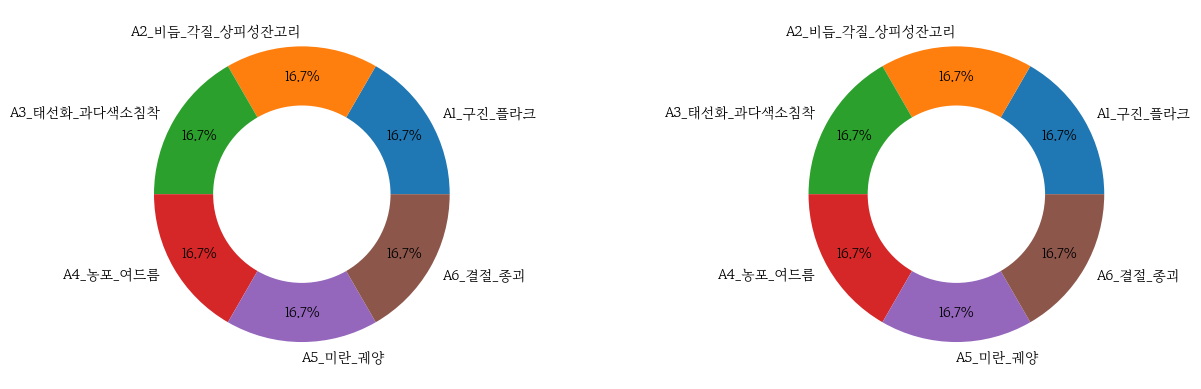

In [ ]:
wed={"width": 0.4}
plt.subplot(1,2,1)
plt.pie(train_count, labels=disease_name, autopct='%.1f%%', wedgeprops=wed, pctdistance=0.8)
plt.plot('Train')
plt.subplot(1,2,2)
plt.pie(val_count, labels=disease_name, autopct='%.1f%%', wedgeprops=wed, pctdistance=0.8)
plt.plot('Val')
plt.subplots_adjust(right=2)
plt.show()

In [ ]:
for i in tqdm(range(len(original_json_list))):
  for j in range(len(original_json_list[i])):
    json_name = original_json_list[i][j].split('/')[-1].split('.')[0]
    for k in range(len(moved_train_image)):
      jpg_name = moved_train_image[k].split('/')[-1].split('.')[0]
      if json_name == jpg_name:
        shutil.copy(original_json_list[i][j], '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/json2/train/'+json_name+'.json')
        print(json_name+'.json is copied.')
    for w in range(len(moved_val_image)):
      jpg_name = moved_val_image[w].split('/')[-1].split('.')[0]
      if json_name == jpg_name:
        shutil.copy(original_json_list[i][j],'/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/json2/val/'+json_name+'.json')
        if os.path.exists('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/json2/val/'+json_name+'.json'):
          print(json_name+'.json is copied.')

train_json = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/json2/train/*.json')
val_json = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/json2/val/*.json')
print('train: ', confirm_file(train_json))
print('val: ', confirm_file(val_json))

# 이미지 전처리 및 폴리곤 검사

/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/json/train/IMG_D_A2_602272
(1080, 1920, 3)
Polygon:  [[1351, 111, 1185, 64, 970, 46, 721, 129, 490, 216, 421, 461, 453, 666, 564, 820, 772, 848, 947, 852, 1121, 897, 1233, 895, 1354, 839, 1360, 828, 1397, 781, 1441, 677, 1513, 516, 1516, 347, 1493, 245, 1413, 157, 1351, 111], [326, 162, 260, 133, 168, 160, 123, 212, 92, 328, 85, 588, 79, 724, 187, 875, 303, 864, 344, 740, 390, 606, 425, 411, 410, 285, 326, 162]]
Bounding box:  [[421, 46, 1095, 851], [79, 133, 346, 742]]


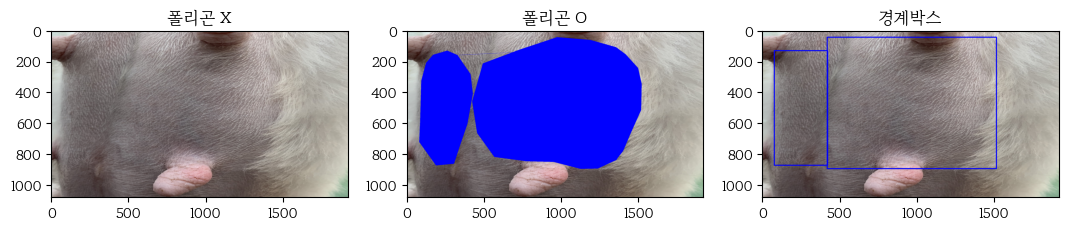

In [ ]:
#원래 크기의 이미지

#read_image = moved_train_image[200]
read_image = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/images2/train/IMG_D_A2_602272.jpg'
#read_json = moved_train_image[200].split('/')[-1]
read_json = read_image.split('/')[-1]
read_json = read_json.split('.')[0]
read_json = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/json/train/' + read_json + '.json'

print(read_json.split('.')[0])

image = cv2.imread(read_image, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(13,16))
print(image.shape)
plt.subplot(2,3,1)
plt.title('폴리곤 X')
plt.imshow(image)


#json으로 폴리곤 표시
with open(read_json, 'r') as f:
  data = json.load(f)

np_poly_list = []
np_bbox_list = []
polygon_list = []
bbox_list = []
if len(data['labelingInfo']) > 2:
  for i in range(len(data['labelingInfo'])):
    if 'polygon' == list(data['labelingInfo'][i].keys())[0]:
      polygon_list.append(list(data['labelingInfo'][i]['polygon']['location'][0].values()))
    elif 'box' == list(data['labelingInfo'][i].keys())[0]:
      bbox_list.append(list(data['labelingInfo'][i]['box']['location'][0].values()))
  for k in range(len(polygon_list)):
    for i in range(0, len(polygon_list[k])-1, 2):
      np_poly_list.append([polygon_list[k][i], polygon_list[k][i+1]])
  for k in range(len(bbox_list)):
    for j in range(0, len(bbox_list[k])-1, 2):
      np_bbox_list.append([bbox_list[k][j], bbox_list[k][j+1]])

else:
  polygon_list.append(list(data['labelingInfo'][0]['polygon']['location'][0].values()))
  bbox_list.append(list(data['labelingInfo'][1]['box']['location'][0].values()))
  for i in range(0, len(polygon_list)-1, 2):
    np_poly_list.append([polygon_list[i], polygon_list[i+1]])
  for j in range(0, len(bbox_list)-1, 2):
    np_bbox_list.append([bbox_list[j], bbox_list[j+1]])

print('Polygon: ',polygon_list)
print('Bounding box: ',bbox_list)

plt.subplot(2,3,2)
plt.title('폴리곤 O')
polygon_image = cv2.imread(read_image, cv2.IMREAD_COLOR)
polygon_image = cv2.cvtColor(polygon_image, cv2.COLOR_BGR2RGB)

np_poly = np.array(np_poly_list, dtype=np.int32)
np_bbox = np.array(np_bbox_list, dtype=np.int32)

cv2.fillPoly(polygon_image, pts=[np_poly], color=(0,0,255))
plt.imshow(polygon_image)

plt.subplot(2,3,3)
bbox_image = cv2.imread(read_image, cv2.IMREAD_COLOR)
bbox_image = cv2.cvtColor(bbox_image, cv2.COLOR_BGR2RGB)
plt.title('경계박스')
if len(bbox_list) > 1:
  for i in range(len(bbox_list)):
    cv2.rectangle(bbox_image, (bbox_list[i][0], bbox_list[i][1], bbox_list[i][2], bbox_list[i][3]), (0,0,255), 5)
plt.imshow(bbox_image)


중심 좌표 리스트:  [968, 252] [471, 504]
xy:  [[46, 897, 421, 1516], [133, 875, 79, 425]]
바뀌기 전 start_y, end_y, start_x, end_x:  [[46, 897, 421, 1516], [133, 875, 79, 425]]
바뀐 후 start_y, end_y, start_x, end_x:  [[46, 897, 421, 1516], [133, 875, 79, 425]]
x, y:  [421, 1516, 79, 425] [46, 897, 133, 875]
min_x, min_y, max_x, max_y:  79 46 1516 897
(851, 1437, 3)


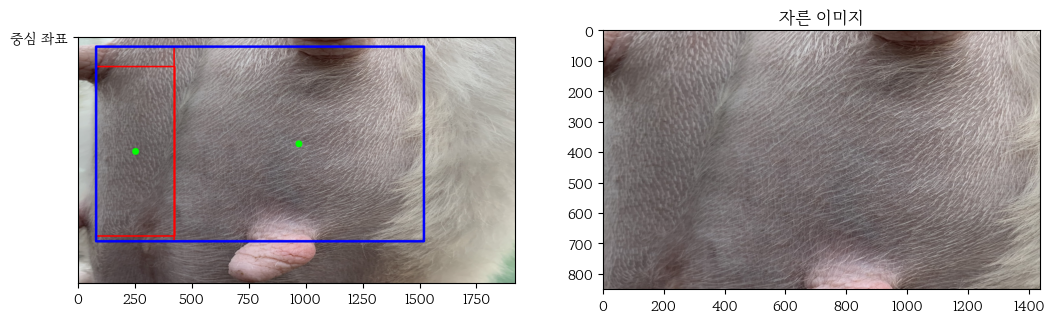

In [ ]:
#------------- 이미지 전처리
# 따로 명암, 대비 등에 관해서는 처리하지 않음.

image_shape = list(image.shape)

center_x_list = []
center_y_list = []
xy = []

crop_digit1 = 300
crop_digit2 = 0

if len(bbox_list) > 1:
  crop_digit = crop_digit2
else:
  crop_digit = crop_digit1

for i in range(len(bbox_list)):
  center_x = (bbox_list[i][0] + (bbox_list[i][0] + bbox_list[i][2])) // 2
  center_y = (bbox_list[i][1] + (bbox_list[i][1] + bbox_list[i][3])) // 2
  center_x_list.append(center_x)
  center_y_list.append(center_y)

  start_y = bbox_list[i][1]-crop_digit
  end_y = bbox_list[i][1] + bbox_list[i][3] + crop_digit
  start_x = bbox_list[i][0]-crop_digit
  end_x = bbox_list[i][0] + bbox_list[i][2] + crop_digit
  xy.append([start_y, end_y, start_x, end_x])

print("중심 좌표 리스트: ", center_x_list, center_y_list)
print("xy: ", xy)

point_image = cv2.imread(read_image, cv2.IMREAD_COLOR)
point_image = cv2.cvtColor(point_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(7,10))
plt.subplots_adjust(right=1.5, top=1)

print("바뀌기 전 start_y, end_y, start_x, end_x: ", xy)
for k in range(len(xy)):
  for i in range(len(xy[k])):
    if xy[k][i] < 0:
      xy[k][i] = 0
    if (i == 0 and xy[k][i] > image_shape[0]) or (i == 1 and xy[k][i] > image_shape[0]):
      xy[k][i] = image_shape[0]
    elif (i == 2 and xy[k][i] > image_shape[1]) or (i == 3 and xy[k][i] > image_shape[1]):
      xy[k][i] = image_shape[1]

print("바뀐 후 start_y, end_y, start_x, end_x: ", xy)
plt.subplot(1,2,1)
plt.plot('중심 좌표')
for i in range(len(center_x_list)):
  cv2.line(point_image, (center_x_list[i], center_y_list[i]),(center_x_list[i], center_y_list[i]), (0,255,0), 30) #중심 좌표
for i in range(len(bbox_list)):
  cv2.rectangle(point_image, (bbox_list[i][0], bbox_list[i][1], bbox_list[i][2], bbox_list[i][3]), (255,0,0), 5) #경계 박스

plt.imshow(point_image)
#자를 영역의 경우 모든 경계박스 중에서 최소최대의 x,y 값을 찾아 큰 영역을 만들어 자름.
x_l = []
y_l = []

for i in range(len(xy)):
  x_l.append(xy[i][2])
  x_l.append(xy[i][3])
  y_l.append(xy[i][0])
  y_l.append(xy[i][1])

print("x, y: ", x_l, y_l)
min_x = min(x_l)
min_y = min(y_l)
max_x = max(x_l)
max_y = max(y_l)
print("min_x, min_y, max_x, max_y: ", min_x, min_y, max_x, max_y)


cv2.rectangle(point_image, (min_x, min_y), (max_x, max_y), (0,0,255), 10) #자를 영역
plt.imshow(point_image)

plt.subplot(1,2,2)
plt.title('자른 이미지')

image_cropped = image[min_y:max_y, min_x:max_x]

plt.imshow(image_cropped)

print(image_cropped.shape)

### 이미지 전처리 함수

In [ ]:
#이미지 전처리 함수

save_image_dir = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/images2/cropped_val'
if not os.path.exists(save_image_dir):
  os.makedirs(save_image_dir)

def image_preprocessing(image_adr):
  if os.path.exists(save_image_dir + '/' + image_adr.split('/')[-1]):
    return
  else:
    image = cv2.imread(image_adr)
    image_shape = list(image.shape)
    image_name = image_adr.split('/')[-1]

    train_or_val = image_adr.split('/')[-2]
    read_json = image_adr.split('/')[-1]
    json_name = read_json.split('.')[0]
    read_json = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/json2/'+ train_or_val + '/' + json_name + '.json'
    with open(read_json, 'r') as f:
      data = json.load(f)

    #polygon과 bbox가 여러개인지
    #각각 나눠져서 연속으로 있거나 polygon, bbox 엇갈려서 있는 경우도 있음
    polygon_list = []
    bbox_list = []

    if len(data['labelingInfo']) > 2:
      for i in range(len(data['labelingInfo'])):
        if 'polygon' == list(data['labelingInfo'][i].keys())[0]:
          polygon_list.append(list(data['labelingInfo'][i]['polygon']['location'][0].values()))
        elif 'box' == list(data['labelingInfo'][i].keys())[0]:
          bbox_list.append(list(data['labelingInfo'][i]['box']['location'][0].values()))
    else:
      polygon_list.append(list(data['labelingInfo'][0]['polygon']['location'][0].values()))
      bbox_list.append(list(data['labelingInfo'][1]['box']['location'][0].values()))

    center_x_list = []
    center_y_list = []
    xy = []

    crop_digit1 = 300
    crop_digit2 = 0

    if len(bbox_list) > 1:
      crop_digit = crop_digit2
    else:
      crop_digit = crop_digit1

    for i in range(len(bbox_list)):
      center_x = (bbox_list[i][0] + (bbox_list[i][0] + bbox_list[i][2])) // 2
      center_y = (bbox_list[i][1] + (bbox_list[i][1] + bbox_list[i][3])) // 2
      center_x_list.append(center_x)
      center_y_list.append(center_y)

      start_y = bbox_list[i][1]-crop_digit
      end_y = bbox_list[i][1] + bbox_list[i][3] + crop_digit
      start_x = bbox_list[i][0]-crop_digit
      end_x = bbox_list[i][0] + bbox_list[i][2] + crop_digit
      xy.append([start_y, end_y, start_x, end_x])

    for k in range(len(xy)):
      for i in range(len(xy[k])):
        if xy[k][i] < 0:
          xy[k][i] = 0
        if (i == 0 and xy[k][i] > image_shape[0]) or (i == 1 and xy[k][i] > image_shape[0]):
          xy[k][i] = image_shape[0]
        elif (i == 2 and xy[k][i] > image_shape[1]) or (i == 3 and xy[k][i] > image_shape[1]):
          xy[k][i] = image_shape[1]

    x_l = []
    y_l = []

    for i in range(len(xy)):
      x_l.append(xy[i][2])
      x_l.append(xy[i][3])
      y_l.append(xy[i][0])
      y_l.append(xy[i][1])

    min_x = min(x_l)
    min_y = min(y_l)
    max_x = max(x_l)
    max_y = max(y_l)

    image_cropped = image[min_y:max_y, min_x:max_x]
    image_cropped = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB)
    make_cropped_image_dir = save_image_dir + '/' + image_name
    cv2.imwrite(make_cropped_image_dir, cv2.cvtColor(image_cropped, cv2.COLOR_RGB2BGR))
    if not os.path.exists(make_cropped_image_dir):
      print(image_name, '파일이 생성되지 않았음.')
    #print(image_name, '  완료')

for i in tqdm(moved_val_image):
  #print(i.split('/')[-1], '  진행')
  image_preprocessing(i)

  0%|          | 0/900 [00:00<?, ?it/s]

In [ ]:
cti = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/images2/cropped_train/*.jpg')
cvi = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/images2/cropped_val/*.jpg')
print(confirm_file(cti))
print(confirm_file(cvi))

[2000, 2000, 2000, 2000, 2000, 2000]
[150, 150, 150, 150, 150, 150]


### 수정된 좌표 확인

polygon:  [[1351, 111, 1185, 64, 970, 46, 721, 129, 490, 216, 421, 461, 453, 666, 564, 820, 772, 848, 947, 852, 1121, 897, 1233, 895, 1354, 839, 1360, 828, 1397, 781, 1441, 677, 1513, 516, 1516, 347, 1493, 245, 1413, 157, 1351, 111], [326, 162, 260, 133, 168, 160, 123, 212, 92, 328, 85, 588, 79, 724, 187, 875, 303, 864, 344, 740, 390, 606, 425, 411, 410, 285, 326, 162]]
bbox:  [[421, 46, 1095, 851], [79, 133, 346, 742]]
잘린 이미지 사이즈:  (851, 1437, 3)
txt 변환 좌표:  [1699.5407098121086, 82.49118683901293, 1477.7453027139875, 22.84371327849589, 1190.480167014614, 0.0, 857.7870563674321, 105.33490011750881, 549.1440501043841, 215.74618096357224, 456.95198329853866, 526.674500587544, 499.7077244258873, 786.8390129259694, 648.0167014613779, 982.2796709753231, 925.929018789144, 1017.8143360752057, 1159.749478079332, 1022.8907168037603, 1392.2338204592902, 1080.0, 1541.8789144050104, 1077.4618096357226, 1703.5490605427976, 1006.3924794359577, 1711.5657620041752, 992.4324324324325, 1761.002087682672

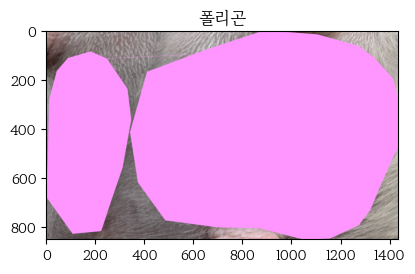

In [ ]:
img_path = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/images/train/IMG_D_A2_602272.jpg'

with open('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/labels/train/IMG_D_A2_602272.txt', 'r') as f:
  data = f.read()

json_path = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/json/train/IMG_D_A2_602272.json'
with open(json_path, 'r') as f:
  data2 = json.load(f)

polygon_list = []
bbox_list = []
np_poly_list = []

if len(data2['labelingInfo']) > 2:
  for i in range(len(data2['labelingInfo'])):
    if 'polygon' == list(data2['labelingInfo'][i].keys())[0]:
        polygon_list.append(list(data2['labelingInfo'][i]['polygon']['location'][0].values()))
    elif 'box' == list(data2['labelingInfo'][i].keys())[0]:
      bbox_list.append(list(data2['labelingInfo'][i]['box']['location'][0].values()))

else:
  polygon_list.append(list(data2['labelingInfo'][0]['polygon']['location'][0].values()))
  bbox_list.append(list(data2['labelingInfo'][1]['box']['location'][0].values()))

np_poly = np.array(np_poly_list, dtype=np.int32)

print('polygon: ', polygon_list)
print('bbox: ', bbox_list)

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

crop_digit1 = 300
crop_digit2 = 0

original_img_height = 1080
original_img_width = 1920

txt_lists = []
original_list = []
txt_list = data.split('\n')
txt_list.pop()

#print('1: ', len(txt_list),txt_list)
for i in range(len(txt_list)):
  txt_lists.append(txt_list[i].split(' '))
#print('2: ', len(txt_lists),txt_lists)
for i in range(len(txt_lists)):
  txt_lists[i].pop(0)
#print(txt_lists)
#txt_list = [float(i) for i in txt_list]
for i in range(len(txt_lists)):
  for j in range(len(txt_lists[i])):
    txt_lists[i][j] = float(txt_lists[i][j])
    if j == 0:
      original_list.append(txt_lists[i][j] * original_img_width)
    elif (j % 2) != 0:
      original_list.append(txt_lists[i][j] * original_img_height)
    elif (j % 2) == 0:
      original_list.append(txt_lists[i][j] * original_img_width)

img_size = img.shape
print('잘린 이미지 사이즈: ', img_size)

print("txt 변환 좌표: ", original_list)

#자르면서 이동된 좌표를 잘려진 이미지에 맞게 수정

if len(bbox_list) == 1:
  print("경계 박스가 1개")
  start_y = bbox_list[0][1] - crop_digit1
  start_x = bbox_list[0][0] - crop_digit1
  if start_y < 0:
    start_y = 0
  elif start_y > image.shape[0]:
    start_y = image.shape[0]
  elif start_x < 0:
    start_x = 0
  elif start_x > image.shape[1]:
    start_x = image.shape[1]

  start_xy = [start_x, start_y]
  print('start_y, start_x: ', start_y, start_x)

  list2 = []
  for i in range(len(original_list)):
    if i == 0 :
      list2.append(original_list[i] - start_x)
    elif i % 2 != 0:
      list2.append(original_list[i] - start_y)
    elif i % 2 == 0:
      list2.append(original_list[i] - start_x)

  for i in range(0, len(list2)-1, 2):
    np_poly_list.append([list2[i], list2[i+1]])
  np_poly = np.array(np_poly_list, dtype=np.int32)

  print("수정한 좌표: ", list2)
  plt.subplot(1,2,1)
  cv2.fillPoly(img, pts=[np_poly], color=(0,0,255))
  plt.title('폴리곤')
  plt.imshow(img)


else:
  center_x_list = []
  center_y_list = []
  xy = []
  print("경계 박스가 여러개")
  for i in range(len(bbox_list)):
    center_x = (bbox_list[i][0] + (bbox_list[i][0] + bbox_list[i][2])) // 2
    center_y = (bbox_list[i][1] + (bbox_list[i][1] + bbox_list[i][3])) // 2
    center_x_list.append(center_x)
    center_y_list.append(center_y)

    start_y = bbox_list[i][1]-crop_digit2
    end_y = bbox_list[i][1] + bbox_list[i][3] + crop_digit2
    start_x = bbox_list[i][0]-crop_digit2
    end_x = bbox_list[i][0] + bbox_list[i][2] + crop_digit2
    xy.append([start_y, end_y, start_x, end_x])

  for k in range(len(xy)):
    for i in range(len(xy[k])):
      if xy[k][i] < 0:
        xy[k][i] = 0
      if (i == 0 and xy[k][i] > image_shape[0]) or (i == 1 and xy[k][i] > image_shape[0]):
        xy[k][i] = image_shape[0]
      elif (i == 2 and xy[k][i] > image_shape[1]) or (i == 3 and xy[k][i] > image_shape[1]):
        xy[k][i] = image_shape[1]

  x_l = []
  y_l = []

  for i in range(len(xy)):
    x_l.append(xy[i][2])
    x_l.append(xy[i][3])
    y_l.append(xy[i][0])
    y_l.append(xy[i][1])

  min_x = min(x_l)
  min_y = min(y_l)

  print("start_y, start_x: ", min_y, min_x)
  list2 = [[] for i in range(len(polygon_list))]

  np_poly2_list = []

  for i in range(len(polygon_list)):
    for j in range(len(polygon_list[i])):
      if j == 0 :
        list2[i].append(polygon_list[i][j] - min_x)
      elif j % 2 != 0:
        list2[i].append(polygon_list[i][j] - min_y)
      elif j % 2 == 0:
        list2[i].append(polygon_list[i][j] - min_x)

  for k in range(len(list2)):
    for i in range(0, len(list2[k])-1, 2):
      #if k == 1:
        #np_poly2_list.append([list2[k][i], list2[k][i+1]])
      np_poly_list.append([list2[k][i], list2[k][i+1]])

  np_poly = np.array(np_poly_list, dtype=np.int32)
  #np_poly2 = np.array(np_poly2_list, dtype=np.int32)

  #print(len(np_poly),np_poly)
  #print(len(np_poly2),np_poly2)

  print("수정한 좌표: ", list2)

  #plt.subplot(1,2,1)
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,2)
  for i in range(len(list2)):
    cv2.fillPoly(img, pts=[np_poly],  color=(255,150,255))
  plt.title('폴리곤')
  plt.imshow(img)


# JSON 파일 수정

In [ ]:
def revise_json(img_path, json_path, output_path):
  img = cv2.imread(img_path)
  img_size = list(img.shape)
  img_size = str(img_size[1]) + 'X' + str(img_size[0])
  file_name = img_path.split('/')[-1].split('.')[0]

  with open(json_path, 'r') as f:
    data = json.load(f)
  polygon_list = []
  bbox_list = []

  if len(data['labelingInfo']) > 2:
    #print(len(data['labelingInfo']))
    for i in range(len(data['labelingInfo'])):
      if 'polygon' == list(data['labelingInfo'][i].keys())[0]:
          polygon_list.append(list(data['labelingInfo'][i]['polygon']['location'][0].values()))
      elif 'box' == list(data['labelingInfo'][i].keys())[0]:
        bbox_list.append(list(data['labelingInfo'][i]['box']['location'][0].values()))

  else:
    polygon_list.append(list(data['labelingInfo'][0]['polygon']['location'][0].values()))
    bbox_list.append(list(data['labelingInfo'][1]['box']['location'][0].values()))

  original_image_size = data['metaData']['resolution'].split('X')
  original_image_size = [int(original_image_size[0]), int(original_image_size[1])]
  center_x_list = []
  center_y_list = []
  xy = []
  crop_digit1 = 300
  crop_digit2 = 0

  if len(bbox_list) == 1:
    start_y = bbox_list[0][1] - crop_digit1
    start_x = bbox_list[0][0] - crop_digit1
    if start_y < 0:
      start_y = 0
    elif start_y > original_image_size[1]:
      start_y = original_image_size[1]
    elif start_x < 0:
      start_x = 0
    elif start_x > original_image_size[0]:
      start_x = original_image_size[0]

    start_xy = [start_x, start_y]

    list2 = []
    for i in range(len(polygon_list[0])):
      if i == 0 :
        list2.append(polygon_list[0][i] - start_x)
      elif i % 2 != 0:
        list2.append(polygon_list[0][i] - start_y)
      elif i % 2 == 0:
        list2.append(polygon_list[0][i] - start_x)
    #print(file_name)
    #print(len(list2))
    data['metaData']['resolution'] = img_size
    data['labelingInfo'][0]['polygon']['location'][0] = list2
    #print('Img, list2 개수: ', file_name,len(list2))

  else:
    for i in range(len(bbox_list)):
      center_x = (bbox_list[i][0] + (bbox_list[i][0] + bbox_list[i][2])) // 2
      center_y = (bbox_list[i][1] + (bbox_list[i][1] + bbox_list[i][3])) // 2
      center_x_list.append(center_x)
      center_y_list.append(center_y)

      start_y = bbox_list[i][1]-crop_digit2
      end_y = bbox_list[i][1] + bbox_list[i][3] + crop_digit2
      start_x = bbox_list[i][0]-crop_digit2
      end_x = bbox_list[i][0] + bbox_list[i][2] + crop_digit2
      xy.append([start_y, end_y, start_x, end_x])

    for k in range(len(xy)):
      for i in range(len(xy[k])):
        if xy[k][i] < 0:
          xy[k][i] = 0
        if (i == 0 and xy[k][i] > original_image_size[1]) or (i == 1 and xy[k][i] > original_image_size[1]):
          xy[k][i] = original_image_size[1]
        elif (i == 2 and xy[k][i] > original_image_size[0]) or (i == 3 and xy[k][i] > original_image_size[0]):
          xy[k][i] = original_image_size[0]

    x_l = []
    y_l = []

    for i in range(len(xy)):
      x_l.append(xy[i][2])
      x_l.append(xy[i][3])
      y_l.append(xy[i][0])
      y_l.append(xy[i][1])

    min_x = min(x_l)
    min_y = min(y_l)

    list2 = [[] for i in range(len(polygon_list))]
    #print('len(polygon_list)',len(polygon_list))

    for i in range(len(polygon_list)):
      for j in range(len(polygon_list[i])):
        if j == 0 :
          list2[i].append(polygon_list[i][j] - min_x)
        elif j % 2 != 0:
          list2[i].append(polygon_list[i][j] - min_y)
        elif j % 2 == 0:
          list2[i].append(polygon_list[i][j] - min_x)

    data['metaData']['resolution'] = img_size
    k = 0
    for i in range(len(data['labelingInfo'])):
      label_keys = list(data['labelingInfo'][i].keys())[0]
      if 'polygon' == label_keys:
        #print('Img, list2 개수, k, i: ', file_name,len(list2),k, i)
        data['labelingInfo'][i]['polygon']['location'][0] = list2[k]
        k += 1

  with open(os.path.join(output_path, f'{file_name}.json'), 'w') as outfile:
    json.dump(data, outfile)

In [ ]:
cropped_image = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/images2/cropped_train/*.jpg')
json_path = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/json2/train/'
output_path = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/revised_json2/train/'

for i in tqdm(cropped_image):
  file_name = i.split('/')[-1].split('.')[0]
  revise_json(i, json_path + file_name + '.json', output_path)

cropped_val_image = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/images2/cropped_val/*.jpg')
json_path = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/json2/val/'
output_path = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/revised_json2/val/'

for i in tqdm(cropped_val_image):
  file_name = i.split('/')[-1].split('.')[0]
  revise_json(i, json_path + file_name + '.json', output_path)

  0%|          | 0/12000 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

# TXT Annotaion 생성

In [ ]:
#YOLOV8이 요구하는 txt annotation 생성

dog_label_dict = {
    'A1_구진_플라크':0,
    'A2_비듬_각질_상피성잔고리':1,
    'A3_태선화_과다색소침착':2,
    'A4_농포_여드름':3,
    'A5_미란_궤양':4,
    'A6_결절_종괴':5
}

def seg_convert(bb_points, img_size):
  converted_list = [[] for i in range(len(bb_points))]
  #print(bb_points)
  for k in range(len(bb_points)):
    for i in range(len(bb_points[k])):
      if i == 0:
        converted_list[k].append(bb_points[k][0] / int(img_size[0]))
      elif (i % 2) != 0:
        converted_list[k].append(bb_points[k][i] / int(img_size[1]))
      elif (i % 2) == 0:
        converted_list[k].append(bb_points[k][i] / int(img_size[0]))

  return converted_list

def annotation_txt(json_path, output_path):
  location_list = []
  bbox_list = []
  with open(json_path, 'r') as f:
    #print(json_path, 'opend')
    data = json.load(f)
    if len(data['labelingInfo']) > 2:
      for i in range(len(data['labelingInfo'])):
        if 'polygon' == list(data['labelingInfo'][i].keys())[0]:
          location_list.append(list(data['labelingInfo'][i]['polygon']['location'][0]))
          label_name = data['labelingInfo'][i]['polygon']['label']
        elif 'bbox' == list(data['labelingInfo'][i].keys())[0]:
          bbox_list.append(list(data['labelingInfo'][i]['box']))

    else:
      location_list.append(list(data['labelingInfo'][0]['polygon']['location'][0]))
      bbox_list.append(list(data['labelingInfo'][1]['box']))
      label_name = data['labelingInfo'][0]['polygon']['label']

    file_name = json_path.split('/')[-1].split('.')[0]
    split_file_name = file_name.split('_')

    img_size = data['metaData']['resolution']
    img_size = img_size.split('X')

  with open(os.path.join(output_path, f'{file_name}.txt'), 'w') as outfile:
    if split_file_name[1] == 'D':
      label_category = dog_label_dict[label_name]

    seg_polygon = seg_convert(location_list, img_size)
    for i in range(len(seg_polygon)):
      label_str = str(label_category)
      write_str = ''
      for j in range(len(seg_polygon[i])):
        write_str += ' ' + str(seg_polygon[i][j])
      write_str = label_str + write_str + '\n'
      outfile.write(write_str)

In [ ]:
json_paths = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/revised_json2/train/*.json')
output_path = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/labels2/train/'
for i in tqdm(json_paths):
  annotation_txt(i, output_path)
"""
json_paths = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/revised_json2/val/*.json')
output_path = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/labels2/val/'
for i in tqdm(json_paths):
  annotation_txt(i, output_path)
"""

  0%|          | 0/12000 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

#파일 검사

In [ ]:
txt_t = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/labels/train/*.txt')
txt_v = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/labels/val/*.txt')
img_t = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/images/train/*.jpg')
img_v = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/images/val/*.jpg')
json_t = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/revised_json2/train/*.json')
json_v = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/revised_json2/val/*.json')

#print('Train IMG, TXT, JSON: ', len(img_t), len(txt_t), len(json_t))
#print('Val IMG, TXT, JSON: ', len(img_v), len(txt_v), len(json_v))

print('Train IMG, TXT: ', len(img_t), len(txt_t))
print('Val IMG, TXT: ', len(img_v), len(txt_v))

#이미지와 텍스트 파일 개수만 맞으면 된다. json은 따로 데이터를 합치지 않았기 때문에!

Train IMG, TXT:  17005 17005
Val IMG, TXT:  1803 1803


#### 파일 byte 검사

In [ ]:
examine_list = [txt_t, txt_v, img_t, img_v, json_t, json_v]
examine_name_list = ['Train TXT', 'Val TXT', 'Train IMG', 'Val IMG', 'Train JSON', 'Val JSON']
zero_byte_file = [[], [], [], [], [], []]

for el in tqdm(range(len(examine_list))):
  for el_file in examine_list[el]:
    file_size = os.path.getsize(el_file)
    if file_size == 0:
      zero_byte_file[el].append(el_file)

j=0
for i in zero_byte_file:
  print(examine_name_list[j], len(i), '개의 파일이 0 byte')
  j += 1
  print(i)

#### 파일 없는게 있는지 검사

In [ ]:
not_in_json_file = []
not_in_txt_file = []
exist_json_file = []
exist_txt_file = []

img_t_adr = '/'.join(img_t[0].split('/')[:-1])
img_v_adr = '/'.join(img_v[0].split('/')[:-1])
json_t_adr = '/'.join(json_t[0].split('/')[:-1])
json_v_adr = '/'.join(json_v[0].split('/')[:-1])
txt_t_adr = '/'.join(txt_t[0].split('/')[:-1])
txt_v_adr = '/'.join(txt_v[0].split('/')[:-1])

for i in tqdm(img_t):
  jpg_name = i.split('/')[-1].split('.')[0]
  if os.path.exists(json_t_adr + '/' + jpg_name + '.json'):
    exist_json_file.append(jpg_name)
  else:
    not_in_json_file.append(jpg_name)
  if os.path.exists(txt_t_adr + '/' + jpg_name + '.txt'):
    exist_txt_file.append(jpg_name)
  else:
    not_in_txt_file.append(jpg_name)

print("<Train>")

print('\n')
if (len(exist_txt_file)) == 0:
  print("TXT 파일이 존재하지 않음")
  print(len(not_in_txt_file), '개의 TXT 파일이 존재하지 않음.')
  print(not_in_txt_file)

else:
  print(len(exist_txt_file), '개의 TXT 파일 존재')
  print(exist_txt_file)

print("-----------------------------------------------")
print("<Val>")
not_in_json_file = []
not_in_txt_file = []
exist_json_file = []
exist_txt_file = []

for i in tqdm(img_v):
  jpg_name = i.split('/')[-1].split('.')[0]
  if os.path.exists(json_v_adr + '/' + jpg_name + '.json'):
    exist_json_file.append(jpg_name)
  else:
    not_in_json_file.append(jpg_name)
  if os.path.exists(txt_v_adr + '/' + jpg_name + '.txt'):
    exist_txt_file.append(jpg_name)
  else:
    not_in_txt_file.append(jpg_name)

print('\n')
if (len(exist_txt_file)) == 0:
  print("TXT 파일이 존재하지 않음")
  print(len(not_in_txt_file), '개의 TXT 파일이 존재하지 않음.')
  print(not_in_txt_file)

else:
  print(len(exist_txt_file), '개의 TXT 파일 존재')
  print(exist_txt_file)

# Training

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:
data_yaml = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/Dog_data.yaml'
new_hyp = '/content/new_hyperparameter.yaml'

In [ ]:
nine_model2 = YOLO('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/runs/segment/2024-04-08-t1/weights/last.pt')

In [ ]:
nine_model2.val()

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45916514 parameters, 0 gradients, 220.1 GFLOPs


val: Scanning /content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/LM/labels/val.cache... 1803 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1803/1803 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 113/113 [01:37<00:00,  1.16it/s]


                   all       1803       2256      0.506      0.418      0.434      0.223       0.44      0.359      0.345      0.117
             A1_papule       1803        301      0.789      0.625      0.745      0.464      0.743      0.575      0.659      0.247
A2_epidermal collarette       1803        753       0.21     0.0531      0.051     0.0189      0.153     0.0372     0.0279    0.00746
    A3_hemachromatosis       1803        301       0.36      0.279      0.227     0.0834      0.258      0.193      0.114     0.0315
       A4_acne_pustule       1803        301      0.395      0.395      0.366      0.161      0.341      0.329      0.284      0.093
              A5_ulcer       1803        300      0.597      0.493       0.54      0.259      0.517      0.417      0.391      0.129
             A6_nodule       1803        300      0.687      0.663      0.673      0.354      0.631      0.603      0.592      0.192
Speed: 0.3ms preprocess, 38.5ms inference, 0.0ms loss, 2.1ms postpro

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b99887da770>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004